<a href="https://colab.research.google.com/github/91MLP/COMP3122/blob/main/lab7_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Load IRIS dataset

In [2]:
iris = datasets.load_iris()

In [3]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

#### As you can see the dataset is in the form of an object similar to a `dictionay`. What are the `keys` of the dictionary?

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

#### To have better understanding of the dataset, let's print it in tabular form.

In [4]:

df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Figure below illustrates the features and target labels for iris dataset.

<img src="https://raw.githubusercontent.com/PyDataGBC/PyData2025/refs/heads/main/Lab_Week7_KNN/assets/iris.png" width="500" hight="300" />

#### What is the value of the key `data`? Assign the value to a variable `X`

In [5]:
X = iris['data']

#### What is the `shape` of `X`?

In [7]:
print(X.shape)

(150, 4)


#### What is the value of the key `target`? Assign the value to a variable `y`

In [8]:
y = iris['target']

#### What is the `shape` of `y`?

In [10]:
print(y.shape)

(150,)


#### What is the value of the key `target_names`? Assign the value to a variable `target_names`

In [11]:
target_names = iris['target_names']

#### What is the value of the key `feature_names`? Assign the value to a variable `feature_names`

In [12]:
feature_names = iris['feature_names']

# Exploring and looping through the dataset

#### Print the 5th datapoint in your dataset `X`

In [13]:
print(X[4])

[5.  3.6 1.4 0.2]


#### Print the features and target label of flower 1 to 5.

In [14]:
for i in range(5):
    print(f"Flower {i+1}: Features - {X[i]}, Target Label - {y[i]}")

Flower 1: Features - [5.1 3.5 1.4 0.2], Target Label - 0
Flower 2: Features - [4.9 3.  1.4 0.2], Target Label - 0
Flower 3: Features - [4.7 3.2 1.3 0.2], Target Label - 0
Flower 4: Features - [4.6 3.1 1.5 0.2], Target Label - 0
Flower 5: Features - [5.  3.6 1.4 0.2], Target Label - 0


#### Iterate over all datapoints in `X` and calculate the `area` of Sepal and Petal for each flower in the dataset.

`Sepal area` = `Sepal length` * `Sepal width`

`Petal area` = `Petal length` * `Petal width`

In [15]:
sepal_areas = []
petal_areas = []
for i in range(len(X)):
    sepal_area = X[i][0] * X[i][1]
    petal_area = X[i][2] * X[i][3]
    sepal_areas.append(sepal_area)
    petal_areas.append(petal_area)

for i in range(5):
    print(f"Flower {i+1}: Sepal Area - {sepal_areas[i]:.2f}, Petal Area - {petal_areas[i]:.2f}")

Flower 1: Sepal Area - 17.85, Petal Area - 0.28
Flower 2: Sepal Area - 14.70, Petal Area - 0.28
Flower 3: Sepal Area - 15.04, Petal Area - 0.26
Flower 4: Sepal Area - 14.26, Petal Area - 0.30
Flower 5: Sepal Area - 18.00, Petal Area - 0.28


#### Find the `max`, `min`, `mean` and `median` value of each feature in the dataset `X`

Helper: you can iterate through the columns of the dataset and use the `np.max()`, `np.min()`,`np.mean()`, and `np.median()` functions to find the required values. or the better way is to use `axis` parameter of the `np.max()`, `np.min()`,`np.mean()`, and `np.median()` functions.

In [16]:
print("Max of each feature:", np.max(X, axis=0))
print("Min of each feature:", np.min(X, axis=0))
print("Mean of each feature:", np.mean(X, axis=0))
print("Median of each feature:", np.median(X, axis=0))

Max of each feature: [7.9 4.4 6.9 2.5]
Min of each feature: [4.3 2.  1.  0.1]
Mean of each feature: [5.84333333 3.05733333 3.758      1.19933333]
Median of each feature: [5.8  3.   4.35 1.3 ]


# Plotting the data

#### `Box plot` of all features

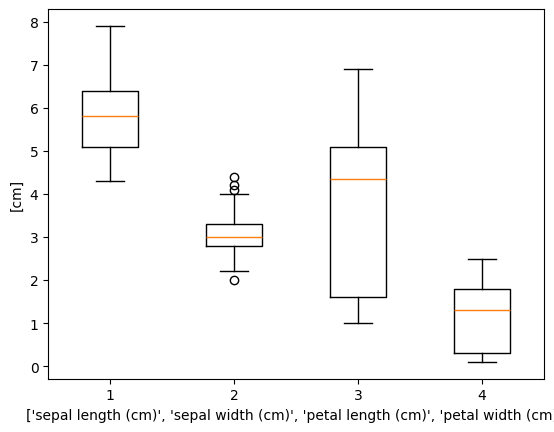

In [17]:
plt.figure()
plt.boxplot(X[:0])
plt.ylabel("[cm]")
plt.xlabel(feature_names)
plt.show()

#### Histogram of each feature

#### Plot the histogram of each feature.

(array([[ 0.,  0.,  0.,  0.,  0., 11., 48., 49., 31., 11.],
        [ 0.,  0., 11., 96., 39.,  4.,  0.,  0.,  0.,  0.],
        [ 0., 44.,  6.,  1., 10., 34., 30., 20.,  5.,  0.],
        [50., 52., 45.,  3.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([0.1 , 0.88, 1.66, 2.44, 3.22, 4.  , 4.78, 5.56, 6.34, 7.12, 7.9 ]),
 <a list of 4 BarContainer objects>)

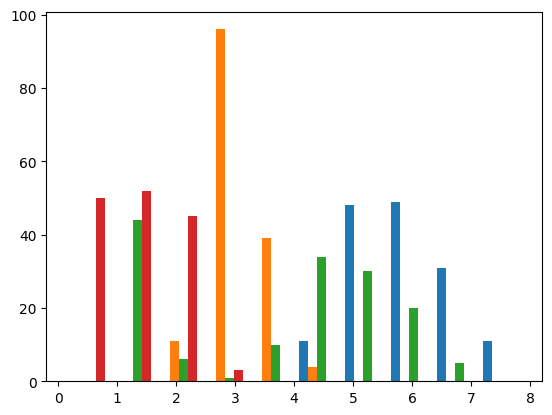

In [19]:
plt.figure()
plt.hist(X)

plt.ylabel()
plt.xlabel()


#### Scatter plot for each pair of features

Plot the scater plot for the pair of first and second features
```python
(X[:,0], X[:,1])
```
Dont't forget to `label` your axes.

hint: use `c=y` inside the scatter plot to color the points based on the target labels.


In [ ]:
#your code here


(Optional) The plots shown above do not have legend. To add legend to the plot, you can use the following code snippet.

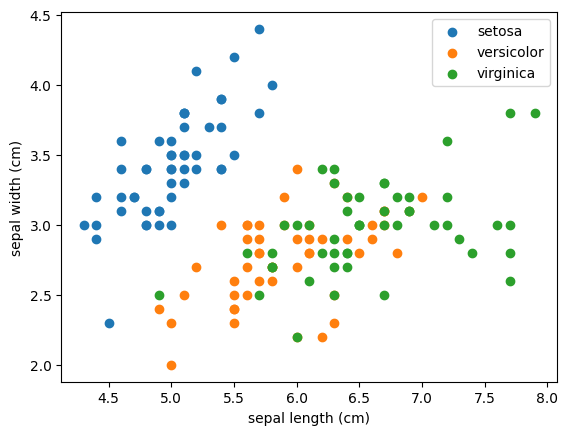

In [ ]:
def plot_pair_with_legned(x1, x2, x1_label , x2_label, y):
    plt.figure()
    for i, target_name in enumerate(iris.target_names):
        plt.scatter(x1[y == i], x2[y == i], label=target_name)

    plt.xlabel(x1_label)
    plt.ylabel(x2_label)
    plt.legend()
    plt.show()

plot_pair_with_legned(X[:,0], X[:,1], feature_names[0], feature_names[1], y)

#### Write a function called plot_pairwise that takes the pair of feaure and their labels and plot the scatter plot.

In [20]:
def plot_pair(X1, X2, x1_label , x2_label, y):
    plt.figure()
    plt.scatter(X1, X2, c=y)
    plt.xlabel(x1_label)
    plt.ylabel(x2_label)
    plt.show()

#### Use plot_pari functions and plot the scatter plot for all pairs of features.
```python
X[:,0], X[:,1], 'Sepal Length', 'Sepal Width'
X[:,0], X[:,2], 'Sepal Length', 'Petal Length'
X[:,0], X[:,3], 'Sepal Length', 'Petal Width'
X[:,1], X[:,2], 'Sepal Width', 'Petal Length'
X[:,1], X[:,3], 'Sepal Width', 'Petal Width'
X[:,2], X[:,3], 'Petal Length', 'Petal Width'
```

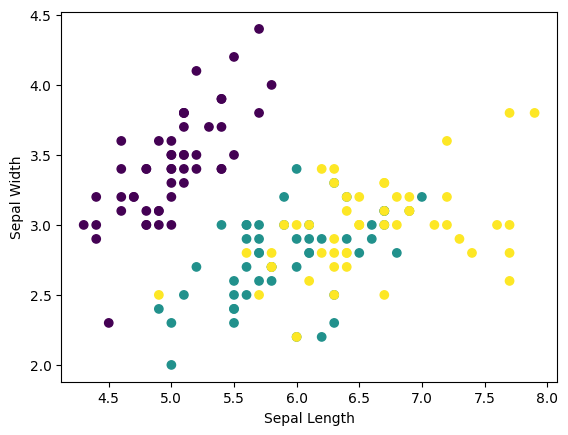

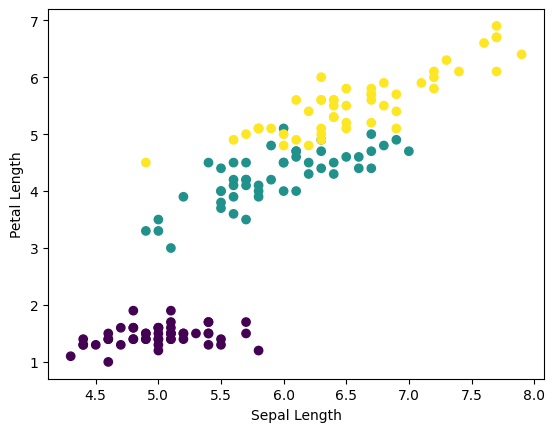

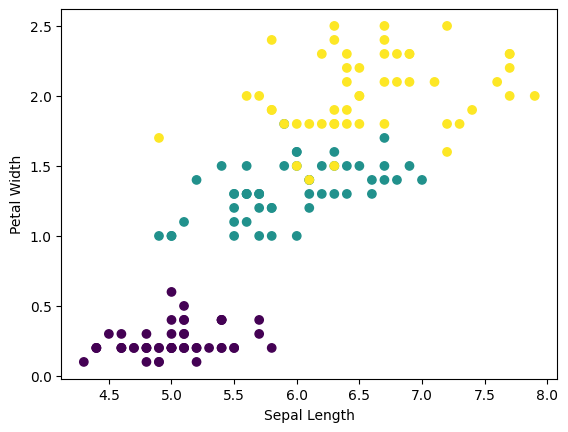

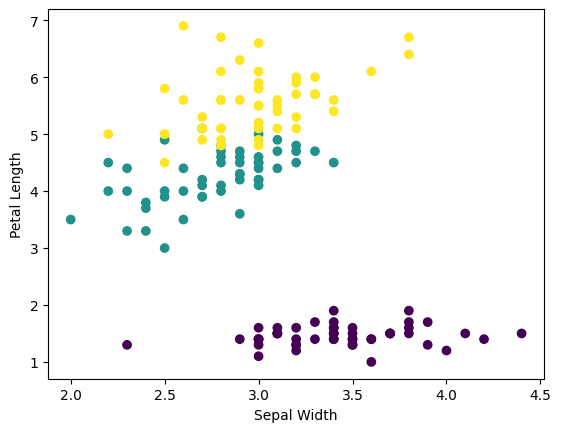

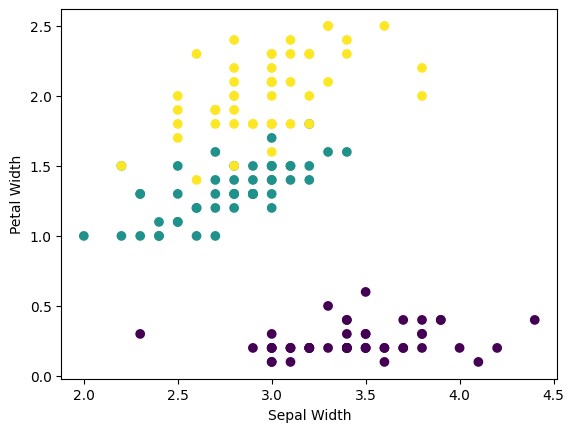

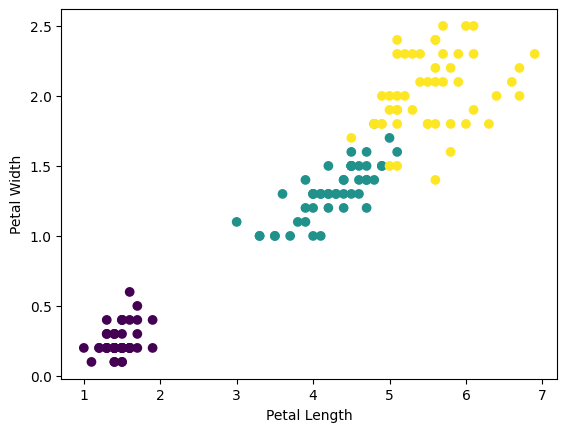

In [21]:
plot_pair(X[:,0], X[:,1], 'Sepal Length', 'Sepal Width', y)
plot_pair(X[:,0], X[:,2], 'Sepal Length', 'Petal Length', y)
plot_pair(X[:,0], X[:,3], 'Sepal Length', 'Petal Width', y)
plot_pair(X[:,1], X[:,2], 'Sepal Width', 'Petal Length', y)
plot_pair(X[:,1], X[:,3], 'Sepal Width', 'Petal Width', y)
plot_pair(X[:,2], X[:,3], 'Petal Length', 'Petal Width', y)

# K Nearest Neighbors (KNN)

## Euclidean Distance (2D)

In geometry, the **Euclidean distance** is the straight-line distance between two points.

Given two points $ P(x_1, y_1) $ and $ Q(x_2, y_2)$ in a 2D plane, the Euclidean distance between them is calculated  as follows:

$
d(P, Q) = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
$

<img src="https://raw.githubusercontent.com/PyDataGBC/PyData2025/refs/heads/main/Lab_Week7_KNN/assets/figure.png" width="400" hight="300" />

#### Example (2D)

Let's say we have two points:
- $ P(2, 2) $
- $ P_2(5, 5) $

$
d(P_1, P_2) = \sqrt{(2 - 5)^2 + (2 - 5)^2}= \sqrt{18} \approx 4.2
$

We can calculate the distance between these two points.

In [22]:
P = np.array([2, 2])
Q = np.array([5, 5])
distance = np.sqrt(np.sum((P - Q)**2))
distance

np.float64(4.242640687119285)


#### Example (3 Dimensions)

Consider two points in 3D space:
- $ P_1(1, 2, 3) $
- $ P_2(4, 0, 8) $

We can calculate the Euclidean distance as follows:

$
d(P_1, P_2) = \sqrt{(4 - 1)^2 + (0 - 2)^2 + (8 - 3)^2}
$

$
d(P_1, P_2) = \sqrt{3^2 + (-2)^2 + 5^2} = \sqrt{9 + 4 + 25} = \sqrt{38} \approx 6.16
$

In [ ]:
# Define two points in 3D space
P1 = np.array([1, 2, 3])
P2 = np.array([4, 0, 8])

# Calculate the Euclidean distance
distance = np.sqrt(np.sum((P2 - P1)**2))

print(f'The Euclidean distance between P1 and P2 is: {distance:.2f}')

The Euclidean distance between P1 and P2 is: 6.16


#### Write a function that get two np arrays `P` and `Q` and return the Euclidean distance between them.


In [24]:
def euclidean_distance(P, Q):
  """Calculates the Euclidean distance between two numpy arrays."""
  return np.sqrt(np.sum((P - Q)**2))

## KNN Algorithm Steps

<img src="https://raw.githubusercontent.com/PyDataGBC/PyData2025/refs/heads/main/Lab_Week7_KNN/assets/knn2.jpg" width="600" hight="100" />

# Implementing KNN

### 0 - Look at the data - Splitting the data into training and testing sets

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

#### What is the `shape` of `X_train`, `X_test`, `y_train`, `y_test`?

In [27]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (75, 4)
Shape of X_test: (75, 4)
Shape of y_train: (75,)
Shape of y_test: (75,)


### 1 - Calculate distances

#### Take one sample from test set and find the distance between this sample and all samples in the training set. In addition to the distance, you need to store the index of the sample in the training set.

#### So for exaple if the distance between the test sample and the 5th sample in the training set is 3.5, you need to store (5, 3.5).

In [28]:
test_instance = X_test[0]
distances = []
for i in range(len(X_train)):
    dist = euclidean_distance(test_instance, X_train[i])
    distances.append((i, dist)) # Store index and distance
print(distances[:5]) # Print first 5 to check

[(0, np.float64(0.8124038404635955)), (1, np.float64(1.438749456993816)), (2, np.float64(1.0535653752852738)), (3, np.float64(3.3674916480965473)), (4, np.float64(1.8601075237738276))]


#### Write a function called `calculate_distances` that takes the test sample and the training set and return the distances and the indices of the training samples.

In [29]:
def calculate_distances(test_instance, X_train):
  """
  Calculates the Euclidean distance between a test instance and all training samples.

  Args:
    test_instance: A single data point from the test set.
    X_train: The training dataset.

  Returns:
    A list of tuples, where each tuple contains the index of a training sample
    and its Euclidean distance to the test instance.
  """
  distances = []
  for i in range(len(X_train)):
      dist = euclidean_distance(test_instance, X_train[i])
      distances.append((i, dist))
  return distances

#### What you pass as `input` to the function `calculate_distances`? What you get as `output` when you call this function?

The `calculate_distances` function takes two inputs:
- `test_instance`: A single data point (a numpy array) from the test set.
- `X_train`: The entire training dataset (a numpy array of shape `(n_samples, n_features)`).

The output of the function is a list of tuples. Each tuple contains two elements:
- The index of a training sample in `X_train`.
- The Euclidean distance between the `test_instance` and that training sample.

#### What is `shape` of `input` arrays to the function `calculate_distances`? What is the `shape` of `output`?

The `test_instance` input is a 1-dimensional numpy array with a shape of `(n_features,)`, where `n_features` is the number of features in your dataset.

The `X_train` input is a 2-dimensional numpy array with a shape of `(n_samples, n_features)`, where `n_samples` is the number of samples in the training set and `n_features` is the number of features.

The output is a list of tuples. The shape of the output cannot be described in terms of numpy array shapes, as it's a list of tuples. However, the length of the list will be equal to the number of samples in the training set (`n_samples`). Each tuple within the list is of the form `(int, float)`, representing the index and distance respectively.

### 2 - Find neighbors

**Step 1:** Sort the (index, distance) tuples based on distance value in anascending order.

In [ ]:
distances = calculate_distances(test_instance, X_train)
distances.sort(key=lambda x: x[1])
distances

**Step 2:** Select the first k elements of the sorted list. And, store the index of these k elements in a list.

In [30]:
k = 3
distances[:k]

[(0, np.float64(0.8124038404635955)),
 (1, np.float64(1.438749456993816)),
 (2, np.float64(1.0535653752852738))]

#### Extract the index of the k nearest neighbors from (index, distance) tuples.

In [31]:
k_nearest_neighbors_indices = [dist[0] for dist in distances[:k]]
print(k_nearest_neighbors_indices)

[0, 1, 2]


#### **Step 3:** Find the labels of these top k samples from y_train array.

In [32]:
k_nearest_neighbors_labels = [y_train[i] for i in k_nearest_neighbors_indices]
print(k_nearest_neighbors_labels)

[np.int64(1), np.int64(2), np.int64(1)]


#### Now write a function `find_neighbors_label` to do all the steps above from 1 to 3.

In [33]:
def find_neighbors_label(test_instance, X_train, y_train, k):
    """
        Inputs
        test_instance: One data point form test set
        X_train: train dataset
        y_train: train labels
        k: number of neighbours

        Output
        neighbor_label: list of k neighbours labels
    """
    #Calculate distances paird with index (index, distance)
    distances = calculate_distances(test_instance, X_train)

    #Sort distances
    distances.sort(key=lambda x: x[1])

    #Get the k nearest neighbors index
    k_nearest_neighbors_indices = [dist[0] for dist in distances[:k]]

    #Get the labels of the k nearest neighbors from y_train
    neighbor_label = [y_train[i] for i in k_nearest_neighbors_indices]

    #return neighbor_label
    return neighbor_label

#### What you pass as `input` to the function `find_neighbors`? What you get as `output` when you call this function?

The find_neighbors_label function takes the following inputs:

test_instance: A single data point from the test set (a numpy array).
X_train: The training dataset (a numpy array).
y_train: The target labels for the training dataset (a numpy array).
k: An integer representing the number of nearest neighbors to consider.
The output of the function is a list of the target labels (neighbor_label) corresponding to the k nearest neighbors in the training set to the test_instance.

#### What is `shape` of `input` arrays to the function `find_neighbors`? What is the `shape` of `output`?

The `test_instance` input is a 1-dimensional numpy array with a shape of `(n_features,)`, where `n_features` is the number of features in your dataset.

The `X_train` input is a 2-dimensional numpy array with a shape of `(n_samples, n_features)`, where `n_samples` is the number of samples in the training set and `n_features` is the number of features.

The `y_train` input is a 1-dimensional numpy array with a shape of `(n_samples,)`.

The `k` input is a single integer.

The output is a list of integers (the labels). The shape of the output cannot be described in terms of numpy array shapes, as it's a list of integers. However, the length of the list will be equal to the value of `k`.

#### Explain what operations  are done inside the function `find_neighbors`  to calculate the label of k nearest neighbors?

The `find_neighbors_label` function performs the following operations to find the labels of the k nearest neighbors for a given test instance:

1.  **Calculate Distances:** It calculates the Euclidean distance between the `test_instance` and every sample in the `X_train` dataset using the `calculate_distances` function. It stores these distances along with the index of the corresponding training sample in a list of tuples.
2.  **Sort Distances:** It sorts the list of (index, distance) tuples in ascending order based on the distance values.
3.  **Identify k Nearest Neighbors:** It selects the first `k` tuples from the sorted list.
4.  **Extract Labels:** It retrieves the target labels from the `y_train` array for the indices of the k nearest neighbors identified in the previous step.
5.  **Return Labels:** It returns a list containing the labels of the k nearest neighbors.

### 3 - Vote on labels

You have this function to vote on labels of the k nearest neighbors.

In [34]:
def vote_on_labels(neighbor_label):
    label_to_num_of_occurance = {}
    for label in neighbor_label:
        label_to_num_of_occurance[label] = label_to_num_of_occurance.get(label, 0) + 1

    prediction = max(label_to_num_of_occurance.items(), key=lambda x: x[1]) # find the label with max occurance (label, num_of_occurance)
    return prediction[0] # return the label form the (label, num_of_occurance) tuple

(optional) This is another way to implement the function - Scikit learn uses this method

In [35]:
import scipy.stats
def vote_on_labels(neighbor_label):
     prediction = scipy.stats.mode(neighbor_label)
     return prediction[0]

In [ ]:
y_pred = vote_on_labels(neighbor_label)
y_pred

np.int64(1)

#### What you pass as `input` to the function `vote_on_label`? What you get as `output` when you call this function?

The `vote_on_labels` function takes one input:
- `neighbor_label`: A list of the target labels of the k nearest neighbors (a list of integers).

The output of the function is a single integer, which is the predicted class label based on the most frequent label among the k nearest neighbors.

#### What is `shape` of `input` arrays to the function `vote_on_label`? What is the `shape` of `output`?

The `vote_on_labels` function takes one input:
- `neighbor_label`: A list of integers. The shape cannot be described as a numpy array shape, but its length is equal to `k`.

The output of the function is a single integer. The shape is just a scalar value, not a numpy array.

### 4 - put it all together

#### Now iterate over all datapoints of `X_test` and calculate their label.

In [36]:
y_pred = []
for test_instance in X_test:
    neighbor_label = find_neighbors_label(test_instance, X_train, y_train, k)
    prediction = vote_on_labels(neighbor_label)
    y_pred.append(prediction)

#### Turn code into a function `KNN` that takes the `training set`, the `target labels` of the training set, the `test set`, and the value of k and return the predicted labels of the test set.

In [37]:
def KNN(X_train, y_train, X_test, k):
    y_pred = []
    for test_instance in X_test:
        neighbor_label = find_neighbors_label(test_instance, X_train, y_train, k)
        prediction = vote_on_labels(neighbor_label)
        y_pred.append(prediction)
    return y_pred

#### What is the `shape` of the `input` to the function `KNN`? What is the `shape` of the `output`?

The `KNN` function takes the following inputs:
- `X_train`: A 2-dimensional numpy array with shape `(n_train_samples, n_features)`.
- `y_train`: A 1-dimensional numpy array with shape `(n_train_samples,)`.
- `X_test`: A 2-dimensional numpy array with shape `(n_test_samples, n_features)`.
- `k`: A single integer.

The output `y_pred` is a list of integers. The shape cannot be described as a numpy array shape, but its length is equal to the number of test samples (`n_test_samples`).

#### Explain which functions you defined from previous steps are used in `KNN` function?

The `KNN` function utilizes the following functions that were defined in the previous steps:

-   `find_neighbors_label(test_instance, X_train, y_train, k)`: This function is called for each `test_instance` in `X_test` to find the labels of its `k` nearest neighbors in the training set.
-   `vote_on_labels(neighbor_label)`: This function is called with the list of neighbor labels returned by `find_neighbors_label` to determine the predicted label for the current `test_instance`.

### 5 - Evaluate the model

Finally, calculate the accuracy of the KNN algorithm.

In [38]:
y_test == y_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [41]:
accuracy = sum(y_test == y_pred) / len(y_test) #takes True as 1 and False as 0
print(f"accuracy: {accuracy * 100} %")

accuracy: 97.33333333333334 %


#### Turn your code into a function `evaluate` that takes the predicted labels and the true labels and return the accuracy of the model.

In [42]:
def evaluate(y_test, y_pred):
    # your code here
    accuracy = sum(y_test == y_pred) / len(y_test)
    return accuracy

#### (Optional) 6 - Hyperparameter tuning

### So far we have used k =3 for number of nearest neighbours. Find the best value of `k` for the KNN algorithm on your dataset.

Helper: Find the accuracy of the model for different values of `k` and plot the accuracy vs `k` to find the best value of `k`.

In [43]:
K = [1, 2, 3, 4, 5, 6, 7, 8]
my_accs = []
for k in K:
    y_pred = KNN(X_train, y_train, X_test, k)
    accuracy = evaluate(y_test, y_pred)
    my_accs.append(accuracy)

# KNN in Scikit-Learn

<img src="https://raw.githubusercontent.com/PyDataGBC/PyData2025/refs/heads/main/Lab_Week7_KNN/assets/Scikit-learn-flow.jpeg" width="500" hight="400" />

In [44]:
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 94.67%
